### Implementate a simple regression model step by step

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(context="notebook", style="whitegrid", palette="dark")
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load digits dataset
iris = datasets.load_iris()

In [3]:
# Creating pd DataFrames
iris_df = pd.DataFrame(data= iris.data, columns= iris.feature_names)
target_df = pd.DataFrame(data= iris.target, columns= ['species'])
target_df = target_df.replace(to_replace=[0,1,2], value=['setosa', 'versicolor', 'virginica'])
# Concatenate the DataFrames
iris_df = pd.concat([iris_df, target_df], axis= 1)

In [4]:
iris_df.insert(0, 'Ones', 1)
iris_df.head()

,Ones,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,1,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,1,4.7,3.2,1.3,0.2,setosa
3,1,4.6,3.1,1.5,0.2,setosa
4,1,5.0,3.6,1.4,0.2,setosa


In [5]:
# Predict the sepal length (cm) of the iris flowers 
# Variables
X= iris_df.drop(['sepal length (cm)', 'species'], axis= 1)
y= iris_df['sepal length (cm)'].values.reshape(-1,1)
X.shape, y.shape

((150, 4), (150, 1))

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112, 1), (38, 1))

In [7]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [8]:
x_train = np.matrix(x_train)
y_train = np.matrix(y_train)
x_test = np.matrix(x_test)
y_test = np.matrix(y_test)
theta = np.matrix(np.array([0,0,0,0]))

In [9]:
x_train.shape, theta.shape, y_train.shape

((112, 4), (1, 4), (112, 1))

In [10]:
computeCost(x_train, y_train, theta)

17.34383928571429

#### 1 - Normal Equation from scratch(OLS)

In [11]:
def normalEqn(X, y):
    theta = np.linalg.inv(X.T@X)@X.T@y
    return theta

In [12]:
theta1=normalEqn(x_train, y_train)
theta1

matrix([[ 1.9413827 ],
        [ 0.60124838],
        [ 0.77903729],
        [-0.73339737]])

In [13]:
computeCost(x_train, y_train, theta1.reshape(1,-1)), computeCost(x_test, y_test, theta1.reshape(1,-1))

(0.04381999892300498, 0.06529628219472738)

In [14]:
y_test_pred_1 = x_test@theta1
print("Mean squared error on test: %.2f"% mean_squared_error(y_test, y_test_pred_1))
print('Variance score: %.2f' % r2_score(y_test, y_test_pred_1))

Mean squared error on test: 0.13
Variance score: 0.80


#### 2 - Gradient Descent from scratch

In [15]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

In [16]:
alpha = 0.01
iters = 1000
theta2, cost = gradientDescent(x_train, y_train, theta, alpha, iters)
theta2

matrix([[ 0.55777778,  1.03312095,  0.65446787, -0.29426655]])

In [17]:
computeCost(x_train, y_train, theta2), computeCost(x_test, y_test, theta2)

(0.06637519077969144, 0.05265109923164781)

In [18]:
y_test_pred_2 = x_test@theta2.T
print("Mean squared error on test: %.2f"% mean_squared_error(y_test, y_test_pred_2))
print('Variance score: %.2f' % r2_score(y_test, y_test_pred_2))

Mean squared error on test: 0.11
Variance score: 0.84


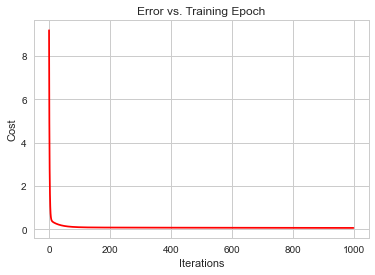

In [19]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

#### 3 - OLS by scikit learn

In [20]:
from sklearn import linear_model
model = linear_model.LinearRegression(fit_intercept = False)
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [21]:
print(model.score(x_train, y_train))
computeCost(x_train, y_train, model.coef_), computeCost(x_test, y_test, model.coef_)

0.8738292376911058


(0.043819998923005, 0.0652962821947284)

In [22]:
# Make predictions using the testing set
y_test_pred = model.predict(x_test)

print('Coefficients: \n', model.coef_)
print("Mean squared error on test: %.2f"% mean_squared_error(y_test, y_test_pred))
print('Variance score: %.2f' % r2_score(y_test, y_test_pred))

Coefficients: 
 [[ 1.9413827   0.60124838  0.77903729 -0.73339737]]
Mean squared error on test: 0.13
Variance score: 0.80


#### 4 - Gradient Search by scikit learn

In [23]:
from sklearn.linear_model import SGDRegressor
model2 = linear_model.SGDRegressor(max_iter=1000, alpha=0.01, loss="squared_loss", fit_intercept = False)
model2.fit(x_train, y_train)

/Users/april/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.01, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=False, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [24]:
print(model2.score(x_train, y_train))
computeCost(x_train, y_train, model2.coef_.reshape(1,-1)), computeCost(x_test, y_test, model2.coef_.reshape(1,-1))

0.7701324181617967


(0.07983463842378458, 0.05225460465782914)

In [25]:
# Make predictions using the testing set
y_test_pred = model2.predict(x_test)

print('Coefficients: \n', model2.coef_)
print("Mean squared error on test: %.2f"% mean_squared_error(y_test, y_test_pred))
print('Variance score: %.2f' % r2_score(y_test, y_test_pred))

Coefficients: 
 [ 0.41423975  1.09554231  0.57375295 -0.0600906 ]
Mean squared error on test: 0.10
Variance score: 0.84


**Note:** Method 4 have different reaults as model 2 due to the L2 penelisation is applied here